# Imports

In [10]:
import logging
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from robpy.regression.base import BaseRobustRegressor
from robpy.regression.lts import FastLTSRegressor

# Simulate data

In [18]:
n_samples = 1000
n_features = 2
vertical_outlier_idx = np.arange(850, 900)
leverage_point_idx = np.arange(900, 950)
bad_leverage_point_idx = np.arange(950, 1000)
total_outliers = len(vertical_outlier_idx) + len(leverage_point_idx) + len(bad_leverage_point_idx)
rng = np.random.RandomState(0)

X, y, coef = make_regression(
    n_samples=n_samples, n_features=n_features, random_state=rng, noise=2.0, bias=0, coef=True
)

# Add strong outliers to the dataset.
y[vertical_outlier_idx] = X[vertical_outlier_idx] @ coef + 10
X[leverage_point_idx] = X[leverage_point_idx] + [[3, -3]]
y[leverage_point_idx] = X[leverage_point_idx] @ coef
X[bad_leverage_point_idx] = X[bad_leverage_point_idx] + [[-3, 3]]
y[bad_leverage_point_idx] = X[bad_leverage_point_idx] @ coef - 20

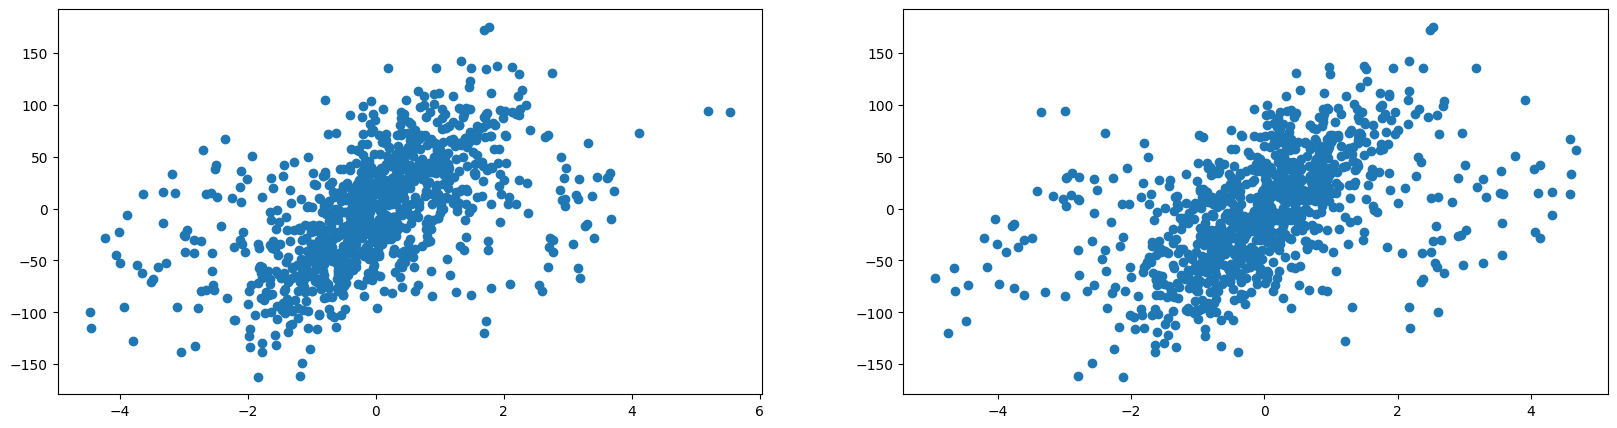

In [19]:
fig, axs = plt.subplots(1, n_features, figsize=(20, 5))
for i, ax in enumerate(axs.flatten()):
    ax.scatter(X[:, i], y)

# Linear regression

In [20]:

class CustomLR(BaseRobustRegressor):
    def fit(self, X, y):
        self.model = LinearRegression().fit(X, y)
        return self
    def predict(self, X):
        return self.model.predict(X)

lr = CustomLR().fit(X, y)

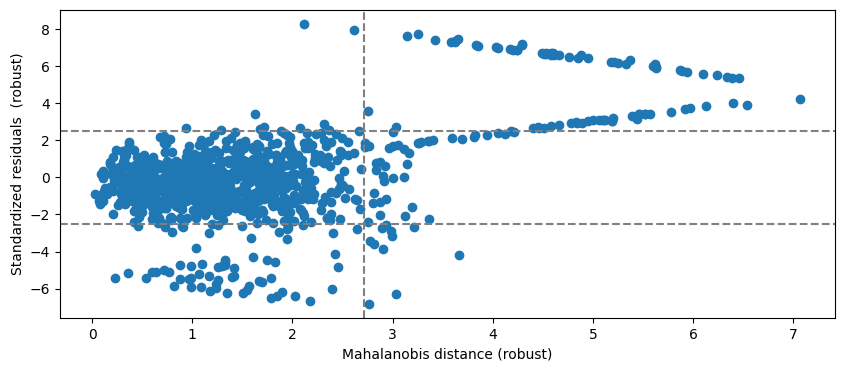

In [21]:
fig = lr.diagnostic_plot(X, y)

# FastLTS

In [22]:
model = FastLTSRegressor(alpha=(1 - total_outliers/n_samples))

model.fit(X, y, verbosity=logging.WARNING)

FastLTSRegressor(alpha=0.85)

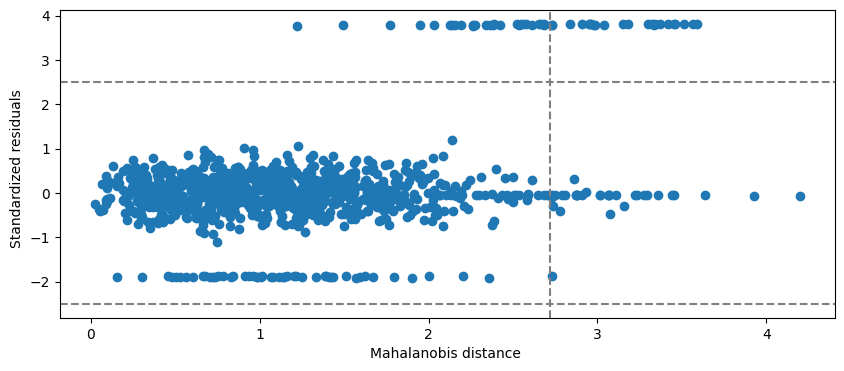

In [25]:
fig = model.diagnostic_plot(X, y, robust_scaling=False, robust_distance=False)

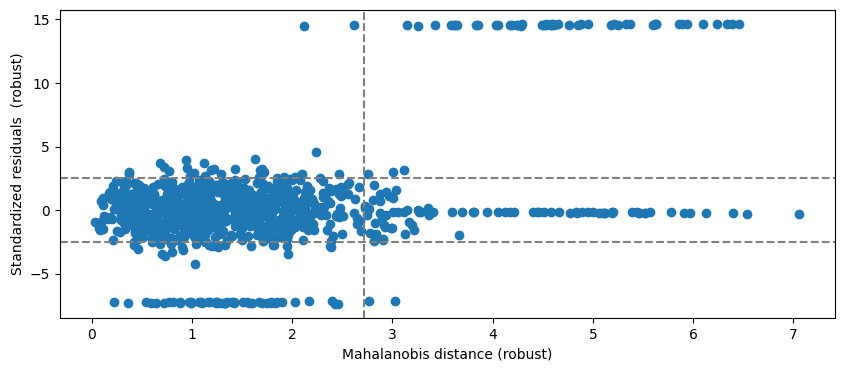

In [26]:
fig = model.diagnostic_plot(X, y, robust_scaling=True, robust_distance=True)